In [1]:
from PIL import Image
import pytesseract
from pytesseract import Output

print(pytesseract.image_to_data(Image.open('pic1.jpg'),  output_type=Output.DICT))

{'level': [1, 2, 3, 4, 5], 'page_num': [1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1], 'par_num': [0, 0, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1], 'word_num': [0, 0, 0, 0, 1], 'left': [0, 0, 0, 0, 0], 'top': [0, 0, 0, 0, 0], 'width': [3872, 990, 990, 990, 990], 'height': [1976, 294, 294, 294, 294], 'conf': ['-1', '-1', '-1', '-1', 95], 'text': ['', '', '', '', '']}


In [2]:
print(pytesseract.image_to_string(Image.open('pic1.jpg'), output_type=Output.BYTES))

b' \n\x0c'


In [ ]:
#провекра Numpy
import numpy as np

numbers = [100, 102, 98, 97, 103]
print(np.std(numbers))
print(np.mean(numbers))

In [3]:
from PIL import Image
import subprocess

def cleanFile(filePath, newFilePath):
    image = Image.open(filePath)

    #установка порога для изображения
    image = image.point(lambda x: 0 if x<135 else 255)
    image.save(newFilePath)

    #вызов tesseract для OCR изображения
    subprocess.call(['tesseract', newFilePath, 'output'])
    
    #запись результата OCR в текстовый файл
    outputFile = open('output.txt', 'r')
    print(outputFile.read())
    outputFile.close()

cleanFile('data/textOriginal.png', 'data/text_2.png')

This is some text, written in Arial, that will be read by
Tesseract. Here are some symbols: !|@#$%*&*()



In [4]:
from PIL import Image
import pytesseract

def cleanFile(filePath, newFilePath):
    image = Image.open(filePath)

      #установка порога для изображения (для выделения текста)
    image = image.point(lambda x: 0 if x<143 else 255)
    image.save(newFilePath)
    return image

image = cleanFile('data/textBad.png', 'data/textCleaned.png')

#вызов tesseract для OCR изображения
print(pytesseract.image_to_string(image))

This 1s some text, written in Arial, that will be read by
Tesseract Here are some symbols: |@#$%*&"(}



In [5]:
import pytesseract
from pytesseract import Output
from PIL import Image
import numpy as np

def cleanFile(filePath, threshold):
    image = Image.open(filePath)
    #установка порога для изображения
    image = image.point(lambda x: 0 if x<threshold else 255)
    return image

def getConfidence(image):
    data = pytesseract.image_to_data(image, output_type=Output.DICT)
    text = data['text']
    confidences = []
    numChars = []
    print(type(data['conf'][0]))
    for i in range(len(text)):
        if  int(data['conf'][i])>-1:
            confidences.append(int(data['conf'][i]))
            numChars.append(len(text[i]))
            
    return np.average(confidences, weights=numChars), sum(numChars)
    
filePath = 'data/textBad.png'

start = 80
step = 5
end = 200

for threshold in range(start, end, step):
    image = cleanFile(filePath, threshold)
    scores = getConfidence(image)
    print('threshold: {}, confidence: {}, numChars {}'.format(str(threshold), str(scores[0]), str(scores[1])))


<class 'str'>
threshold: 80, confidence: 36.10526315789474, numChars 19
<class 'str'>
threshold: 85, confidence: 62.333333333333336, numChars 24
<class 'str'>
threshold: 90, confidence: 49.25, numChars 36
<class 'str'>
threshold: 95, confidence: 39.7, numChars 40
<class 'str'>
threshold: 100, confidence: 49.98360655737705, numChars 61
<class 'str'>
threshold: 105, confidence: 48.83098591549296, numChars 71
<class 'str'>
threshold: 110, confidence: 73.87654320987654, numChars 81
<class 'str'>
threshold: 115, confidence: 73.6219512195122, numChars 82
<class 'str'>
threshold: 120, confidence: 77.06024096385542, numChars 83
<class 'str'>
threshold: 125, confidence: 83.61904761904762, numChars 84
<class 'str'>
threshold: 130, confidence: 75.04761904761905, numChars 84
<class 'str'>
threshold: 135, confidence: 82.42168674698796, numChars 83
<class 'str'>
threshold: 140, confidence: 81.76190476190476, numChars 84
<class 'str'>
threshold: 145, confidence: 88.46428571428571, numChars 84
<class 

Бот щелкает кнопку предпросмотра

In [7]:
import time
from urllib.request import urlretrieve
from PIL import Image
import pytesseract
from selenium import webdriver
from PIL import Image

# создаем Selenium driver
driver = webdriver.Safari()

driver.get(
    'https://www.amazon.com/Death-Ivan-Ilyich-Nikolayevich-Tolstoy/dp/1427027277')
time.sleep(2)

# Щелкаем на кнопку предпросмотра с элементом 'imgBlkFront'
driver.find_element_by_id('imgBlkFront').click()
imageList = []

# ждем, пока страница загрузится
time.sleep(5)

while 'pointer' in driver.find_element_by_id('sitbReaderRightPageTurner').get_attribute('style'):
    # щелаекм пока доступна кнопка вправо для загрузки следующей страницы предпросмотра
    driver.find_element_by_id('sitbReaderRightPageTurner').click()
    time.sleep(2)
    # получаем все загруженные страницы (может сразу загрузиться несколько страниц,
    # но дубликаты игнорируютсяt)
    pages = driver.find_elements_by_xpath(
        '//div[@class=\'pageImage\']/div/img')
    if not len(pages):
        print('No pages found')
    for page in pages:
        image = page.get_attribute('src')
        print('Found image: {}'.format(image))
        if image not in imageList:
            urlretrieve(image, 'page.jpg')
            imageList.append(image)
            print(pytesseract.image_to_string(Image.open('page.jpg')))

driver.quit()

Found image: https://d1b14unh5d6w7g.cloudfront.net/1427027277.01.S003.LXXXXXXX.jpg?Expires=1616833973&Signature=FjfxQq2NGNDfV/cOcZITQemSr117xBEJut8Nj8XO4sg0XONFxQ2IIwl9QF1oNHruJ+7ORbidv33TS8rC/reC4MYshMZDwGBzYaASZnvZhsIzY6lWpZMjOzm8TajzGdGVh5jpGio2xiHByQ74QYTZY4bvkFvjUcFZRp11O85/Erg=&Key-Pair-Id=APKAIUO27P366FGALUMQ
Copyrighted Material

Copyright © 2007

The text in this book has been formatted
and typeset to make reading easier and
more enjoyable. Spelling and punctuation
have been modernized and standardized,
and hyphens have been avoided when
possible. Obvious typographical errors
have been corrected. In addition, the text
has been formatted to the specifications
indicated on the title page. The original
text is out of copyright. The edited text in
this edition and the formatting are the
copyright of Objective Systems Pty Ltd
ACN 085 119 953.
. am

Copyrighted Material

Found image: https://d1b14unh5d6w7g.cloudfront.net/1427027277.01.S006.LXXXXXXX.jpg?Expires=1616833973&Signature=

Found image: https://d1b14unh5d6w7g.cloudfront.net/1427027277.01.S008.LXXXXXXX.jpg?Expires=1616833973&Signature=fMfqYFnhiyVmOFv0whLVLZve+chltxXYrCiuLCgs4xOQyZN3k2+sNo/EN2KEzAL2dLdFv/zvKEb/268a3vchfKpezQ5cA0mhIZi77Rbq++BWtmmxh402NbKNHmDUGccKy19UTWUmCsK5LCT1E3xE6Gtr7B2ZK3Qk1u4JYjss6Tw=&Key-Pair-Id=APKAIUO27P366FGALUMQ
Found image: https://d1b14unh5d6w7g.cloudfront.net/1427027277.01.S009.LXXXXXXX.jpg?Expires=1616833979&Signature=dI17DhgU/vMAEYWgy1DcCFecoxeotqyykbjbZ0MYrxaR1bOwp/4tW1uzxdEz9z4fvYyfa60i0hWNEdGiuK8Lap3cbTTe6bNusWyy2Nbowk2tg+TwLKuwNdieKrzDYJ1dtRlvzDQD9S6/UbbBg2BDxnb3dZyRG3DZk7pqZTy/NdU=&Key-Pair-Id=APKAIUO27P366FGALUMQ
Found image: https://d1b14unh5d6w7g.cloudfront.net/1427027277.01.S00A.LXXXXXXX.jpg?Expires=1616833980&Signature=UHwZrqkQATIihJ1edmJO9AX5e/NCggdHB8XRTjmJiV+4DlI/Tqs6RL9mDzcBUfamKpAm6FsaOmMjTXHhIEtP733Ss57SNjeKL7v+Ejfms8/k0WPNBuanaRFzdfAx1/h0OFbu8tb5afiW2QjegfkAJQaeIAoqxd4SNGNOBM+VcYc=&Key-Pair-Id=APKAIUO27P366FGALUMQ
Found image: https://d1b14unh5d6w7g.cloudfront

Copyrighted Material

Your Customized Book Source

ReadHowYouWant has developed
innovative, patent-pending technology
that enables us to customize books to
suit individual readers.

We continually create new editions that
make reading easier, quicker and more
enjoyable for readers. Our EasyRead
printed books have been optimized to
improve word recognition and ease eye
tracking by adjusting word and line
spacing and minimizing hyphenation.

In addition to several larger-font
formats, we offer formats for people
with dyslexia, macular degeneration, and
eye-tracking problems. We also produce
Braille and DAISY formats and can

Copyrighted Material

Found image: https://d1b14unh5d6w7g.cloudfront.net/1427027277.01.S00B.LXXXXXXX.jpg?Expires=1616833980&Signature=cgwiGtStA0m20vN10zE3AJWMK6ul7Gce1NaqiWdv1/+f+basj5oMC7ij0xYlEiR7BE3JhuR5xRGGtxq9vnRzkVxYbzXDwdyE8Jd656fizRyysHjxr2SrtJlxSVeeJO0lTMGloAihwFhCzGASMQJHV1X2pY9mlz/jafCZTYUK0h8=&Key-Pair-Id=APKAIUO27P366FGALUMQ
Found image: https://d1b14un

Found image: https://d1b14unh5d6w7g.cloudfront.net/1427027277.01.S03D.LXXXXXXX.jpg?Expires=1616834025&Signature=N/xUOU3/kqMHZbJSpmIYWc2iwGyYN4XW8LEEb1WMNHmFABnydtYNnxK4TfYA4NgDtlsGSdkbb9mnM1qEs8zaicbqRyOkvGOHbuTM8WJN5oh2GGG2BteNN7SpuS1MSmuRQdQ/F/MTeXJwwxhXVFYf5gQa4Udn4sqkgzmi7cNRFPc=&Key-Pair-Id=APKAIUO27P366FGALUMQ
Found image: https://d1b14unh5d6w7g.cloudfront.net/1427027277.01.S03E.LXXXXXXX.jpg?Expires=1616833973&Signature=Xi459E1si3967ZUEpnknCYs1ODJ9y+OF7vlImfbFsEwjlWwHMgebggGUFIC+FAfv1O0WhfRqMqdHvzLI25cM0AR7K+LhsjU8rJaM+fZ7WbhtEawMpOEIrGWJid7u8MAwR6ZEVgu3uqj/VDHro5SDSNo8RRnj5tGEAigm5MJFqIo=&Key-Pair-Id=APKAIUO27P366FGALUMQ


Бот добавляет комментарии, заполняет форму, читает CAPTCHA

In [11]:
from urllib.request import urlretrieve
from urllib.request import urlopen
from bs4 import BeautifulSoup
import subprocess
import requests
from PIL import Image
from PIL import ImageOps

def cleanImage(imagePath):
    image = Image.open(imagePath)
    image = image.point(lambda x: 0 if x<143 else 255)
    borderImage = ImageOps.expand(image,border=20,fill='white')
    borderImage.save(imagePath)

html = urlopen('http://www.pythonscraping.com/humans-only')
bs = BeautifulSoup(html, 'html.parser')
#Данные для формы
imageLocation = bs.find('img', {'title': 'Image CAPTCHA'})['src']
formBuildId = bs.find('input', {'name':'form_build_id'})['value']
captchaSid = bs.find('input', {'name':'captcha_sid'})['value']
captchaToken = bs.find('input', {'name':'captcha_token'})['value']

captchaUrl = 'http://pythonscraping.com'+imageLocation
urlretrieve(captchaUrl, 'captcha.jpg')
cleanImage('captcha.jpg')
p = subprocess.Popen(['tesseract', 'captcha.jpg', 'captcha'], stdout=
    subprocess.PIPE,stderr=subprocess.PIPE)
p.wait()
f = open('captcha.txt', 'r')

#Удаляем символы пробела
captchaResponse = f.read().replace(' ', '').replace('\n', '')
print('Попытка распознавания Captcha: '+captchaResponse)

if len(captchaResponse) == 5:
    params = {'captcha_token':captchaToken, 'captcha_sid':captchaSid,   
              'form_id':'comment_node_page_form', 'form_build_id': formBuildId, 
              'captcha_response':captchaResponse, 'name':'Monty Python', 
              'subject': 'I come to seek the Grail', 
              'comment_body[und][0][value]': 
               '...and I am definitely not a bot'}
    r = requests.post('http://www.pythonscraping.com/comment/reply/10', 
                          data=params)
    responseObj = BeautifulSoup(r.text, 'html.parser')
    if responseObj.find('div', {'class':'messages'}) is not None:
        print(responseObj.find('div', {'class':'messages'}).get_text())
else:
    print('Возникли проблемы при распознавании CAPTCHA (неверное число символов)!')

Попытка распознавания Captcha: t¢KGaA
Возникли проблемы при распознавании CAPTCHA (неверное число символов)!


# Распознавание русского текста

In [13]:
rustext = pytesseract.image_to_string(Image.open('data/rustext.png'))
print(rustext)

J[1a BEIMONHEHHA 3aaHHi 10 WabopaTopHol paboTe HeoOxXoMMO HMeTB:

- Tesseract - OCR

- pytesseract (pip install tesseract )
- pillow

- numpy

- selenium

3anaqu 7A BCeX BAPHWaHTOB:

1. Paspa$otalb UporpaMMy JIA pacilo3HaBaHa TekcTa c u300paKeHHA,
Haxoj#llerocad Ha BeO-cTpaHuie, ¢ WOMompIO selenium u Tesseract.

2. Pa3paOotatb uporpamMy (6oTa) ama ureHua CAPTCHA (Completely
Automated Public Turing test to tell Computers and Humans Apart).

3. OOyunts Tesseract 214 pacllo3HaBaHHa ONHOM CAPTCHA. Wcnomp3ya cBoro
lporpammy, c momomb10 webdriver (PhantomJS um Chrome) 3ano0uHuTB
copy Ha caiite c mpocToii 3all{HToH OT GoTo.



In [15]:
# Указываем в параметрах русския язык
rustext = pytesseract.image_to_string(Image.open('data/rustext.png'), lang='rus')
print(rustext)


Для выполнения заданий по лабораторной работе необходимо иметь:

- Теззегасй - ОСК.

- руеззегасЕ (рр ша {еззегасй )
- рШом

- пашру

- з@еппит

Задачи для всех вариантов:

1. Разработать программу для распознавания текста с изображения,
находящегося на веб-странице, с помощью з@еппии и Теззегас".

2. Разработать программу (бота) для чтения САРТСНА (Сотреу
Апютаеа РибЦс Таназ {ез ю {е1 Сошршег$ ап Нитапз Араго.

3. Обучить Теззегас{ для распознавания одной САРТСНА. Используя свою
программу, с помощью уера’1ег (Рвапют]$ или СБготе) заполнить
форму на сайте с простой защитой от ботов.



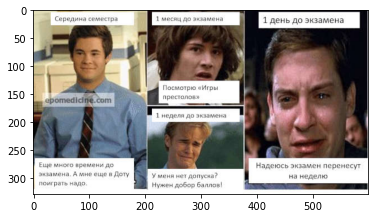

In [17]:
#Пример изображения с текстом. Текст необходимо выделить.
import matplotlib.pyplot as plt
img=Image.open('data/examen-student.jpg')
plt.imshow(img)
img.show()


In [19]:
print( pytesseract.image_to_string(img, lang='rus'))

> време Надеюсь эк перенесут

еще в Доту на неделю

 



In [21]:
#Задание:  получить весь текст. Модифицировать функцию для очистки изображения!
from PIL import Image, ImageEnhance
import pytesseract

def cleanFile(filePath, newFilePath):
    image = Image.open(filePath)
    image=ImageEnhance.Brightness(image).enhance(10.0)
    image=ImageEnhance.Contrast(image).enhance(10.0)
    image=image.convert('1')
      #установка порога для изображения (для выделения текста)
    #image = image.point(lambda x: 0 if x< else 255)
    image.save(newFilePath)
    return image

image = cleanFile('data/examen-student.jpg', 'data/examen-student-Cleaned.jpg')
#image.show()

#print( pytesseract.image_to_string(Image.open('files/examen-student-Cleaned.png'), lang='rus')

In [ ]:
#Задание: получить весь текст.
#Пример изображения с текстом. Текст необходимо выделить.
import matplotlib.pyplot as plt
img=Image.open('files/examen-prepod2.jpg')
plt.imshow(img)
img.show()

In [9]:
from urllib.request import urlretrieve
from urllib.request import urlopen
from bs4 import BeautifulSoup
import subprocess
import requests
from PIL import Image
from PIL import ImageOps


def cleanImage(imagePath):
    image = Image.open(imagePath)
    image = image.point(lambda x: 0 if x<143 else 255)
    borderImage = ImageOps.expand(image,border=20,fill='white')
    borderImage.save(imagePath)

    
html = urlopen('http://www.pythonscraping.com/humans-only')
bs = BeautifulSoup(html, 'html.parser')

#Данные для формы
imageLocation = bs.find('img', {'title': 'Image CAPTCHA'})['src']
formBuildId = bs.find('input', {'name':'form_build_id'})['value']
captchaSid = bs.find('input', {'name':'captcha_sid'})['value']
captchaToken = bs.find('input', {'name':'captcha_token'})['value']

# скачаем капчи для обучения
for i in range(100):
    captchaUrl = 'http://pythonscraping.com'+imageLocation
    filename = 'captcha/captcha_{}.jpg' 
    urlretrieve(captchaUrl, filename.format(i))

